In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
fuel_econ = pd.read_csv('fuel_econ.csv')
print(fuel_econ.shape)
fuel_econ.head(6)

(3929, 20)


,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8
5,32209,Lexus,GS 350,2013,Midsize Cars,Rear-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,0,99,19.4325,24.1499,28.2234,38.5000,22.6002,393,6,6


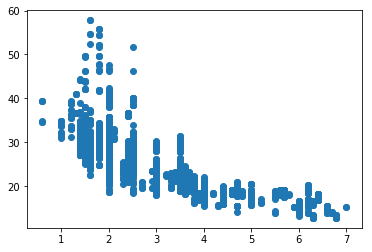

In [3]:
plt.scatter(data = fuel_econ, x = 'displ', y = 'comb');

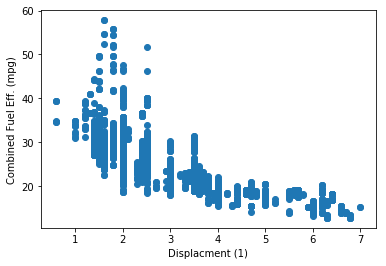

In [4]:
plt.scatter(data = fuel_econ, x = 'displ', y = 'comb');
plt.xlabel('Displacment (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

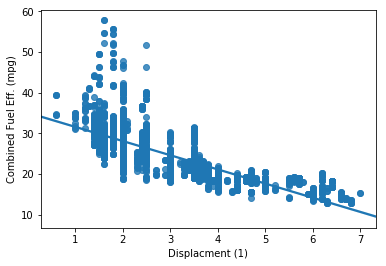

In [5]:
sb.regplot(data = fuel_econ, x = 'displ', y = 'comb');
plt.xlabel('Displacment (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

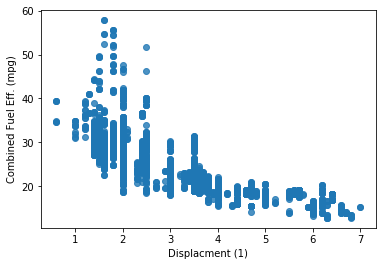

In [6]:
sb.regplot(data = fuel_econ, x = 'displ', y = 'comb', fit_reg = False);
plt.xlabel('Displacment (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

## Overplotting, Transparency, and Jitter

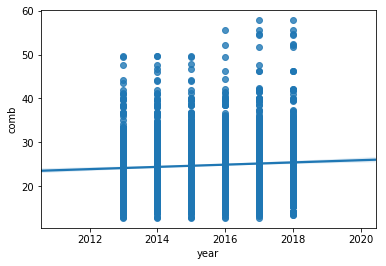

In [7]:
sb.regplot(data = fuel_econ, x = 'year', y = 'comb');

> The regression line that got fit suggest a slight upward trend in efficiency, But this is not clear from the data.
<br></br>
> The only point that we can really make out are those above 42 miles per gallon.

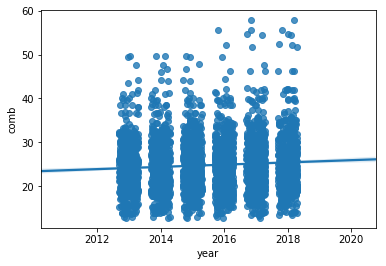

In [8]:
# Let's start with Jitter
# The value 0.3 means that each x value will be adjusted randomly up to 0.3 more or 0.3 less
# It should be noted that this only works with seaborn.regplot() function and not matplotlib.scatter()

sb.regplot(data = fuel_econ, x = 'year', y = 'comb', x_jitter = 0.3);

> This is still not enough to really see the distibution of points below the mid 30
<br></br>
We should add some trancparency

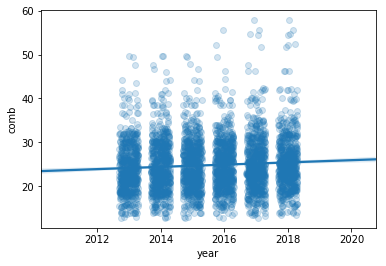

In [9]:
# alpha takes avalue between 0 and 1 that specifies the opaqueness of points
sb.regplot(data = fuel_econ, x = 'year', y = 'comb', x_jitter = 0.3,
           scatter_kws = {'alpha' : 1/5});

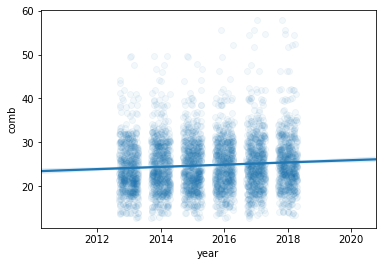

In [10]:
# Let's start with Jitter
sb.regplot(data = fuel_econ, x = 'year', y = 'comb', x_jitter = 0.3,
           scatter_kws = {'alpha' : 1/20});

## Heat Maps

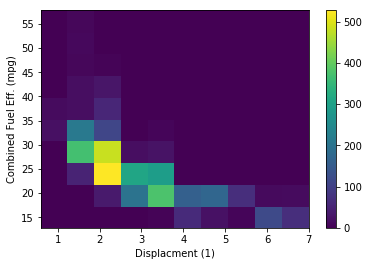

In [11]:
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb');
plt.colorbar()
plt.xlabel('Displacment (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

> By default each dimension is split into 10 bin and the number of points in each rectangular bin is counted up,
<br></br>
> Each count is associated with a color.
<br></br>
> And this default matplotlib color palette called Viridis

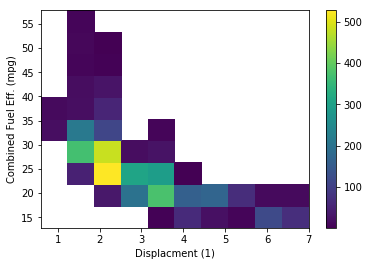

In [12]:
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin = 0.5);
plt.colorbar()
plt.xlabel('Displacment (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

> By setting cmin to a value such as 0.5 , any bin with no counts will return as not a number and not get coloed in
<br></br>
> Since white now represents 0 , we should choose a reversed color palette where darker color are associated with higher value

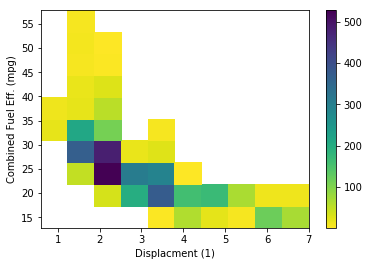

In [13]:
# Set cmap = 'viridis_r'
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin = 0.5,
           cmap = 'viridis_r');
plt.colorbar()
plt.xlabel('Displacment (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

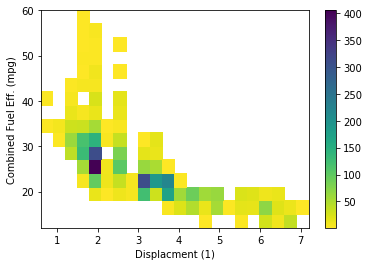

In [14]:
# Finally, Let's change the bins
# But first look at the statistics with describe()

bins_x = np.arange(0.6, 7+0.3, 0.3)
bins_y = np.arange(12, 58+3, 3)
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin = 0.5,
           cmap = 'viridis_r', bins = [bins_x, bins_y]);
plt.colorbar()
plt.xlabel('Displacment (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

In [15]:
fuel_econ[['displ', 'comb']].describe()

,displ,comb
count,3929.000000,3929.000000
mean,2.950573,24.791339
std,1.305901,6.003246
min,0.600000,12.821700
25%,2.000000,20.658100
50%,2.500000,24.000000
75%,3.600000,28.227100
max,7.000000,57.782400


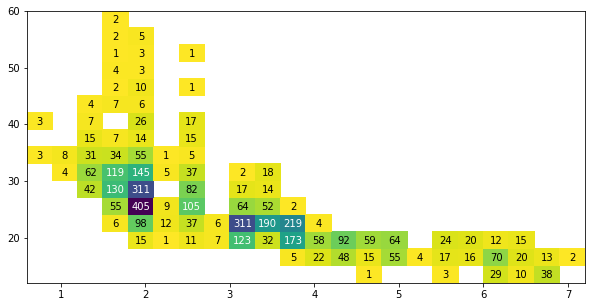

In [16]:
# Try to put the counts inside each square

# hist2d returns a number of different variables, including an array of counts
plt.figure(figsize = [10, 5]) 

bins_x = np.arange(0.6, 7+0.3, 0.3)
bins_y = np.arange(12, 58+3, 3)
h2d = plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin = 0.5,
                 cmap = 'viridis_r', bins = [bins_x, bins_y]);
counts = h2d[0]

# loop through the cell counts and add text annotations for each
for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i,j]
        if c >= 100: # increase visibility on darkest cells
            plt.text(bins_x[i]+0.15, bins_y[j]+1.5, int(c),
                     ha = 'center', va = 'center', color = 'white')
        elif c > 0:
            plt.text(bins_x[i]+0.15, bins_y[j]+1.5, int(c),
                     ha = 'center', va = 'center', color = 'black')

## Violin Plots

In [19]:
# Note : we have used Pandas astype() function to convert the VClass column from a plain object type into an ordered categorical
# type putting the classes in order of size
# This way the sorting of levels is automatic and we do not need a second order parameter in our visualization calls
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
vclasses = pd.api.types.CategoricalDtype(ordered = True, categories = sedan_classes)
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses);

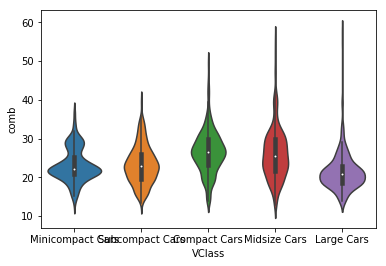

In [20]:
# we should clean it up
sb.violinplot(data = fuel_econ, x = 'VClass', y = 'comb');

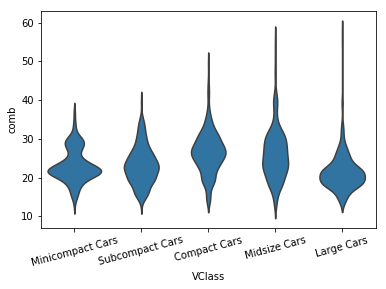

In [22]:
# we should clean it up
base_color = sb.color_palette()[0]
sb.violinplot(data = fuel_econ, x = 'VClass', y = 'comb',
              color = base_color, inner = None); # setting inner = None parameter to clean up the middle of the plott
plt.xticks(rotation = 15);

> From this plot, we can see that there <b>isn't</b> a monotonic 'رتيب' relationship between car size and fuel efficiency.
<br></br>
The <b>largest cars</b> seem to have the <b>lowest</b> fuel efficiencies,but the <b>long tail</b> suggest <b>outliers</b> with the highest of efficiencies.
<br></br>
<b>Minicompact</b> and <b>Subcompact Cars</b> have the <b>next best</b> efficiencies <b>but</b> the distribution for <b>Minicompact Cars</b> is much more <b>peaked</b>.
<br></br>
Finally, <b>Compact</b> and <b>Midsize Cars</b> have the <b>best</b> efficiencies <b>but</b> the distribution of the <b>Midsize Cars</b> broader than the <b>Compacts</b>.

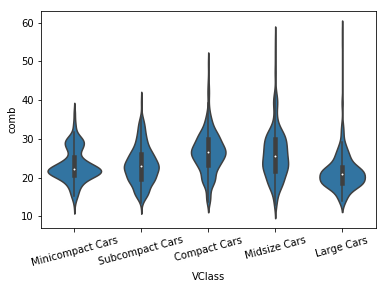

In [23]:
# With out inner = None

base_color = sb.color_palette()[0]
sb.violinplot(data = fuel_econ, x = 'VClass', y = 'comb',
              color = base_color);
plt.xticks(rotation = 15);

> The thing that is plotted in each violin is a miniature box plot.
<br></br>
A box plot is another Quantitative vs. Qualitative plot type that takes a summary approach to displaying the data. 

## Box Plots
Above we used a violin plot to look at the relationship between vehicle class and fuel efficiency.
<br></br>
Now, we will use Box Plots to summarize that relationship. 

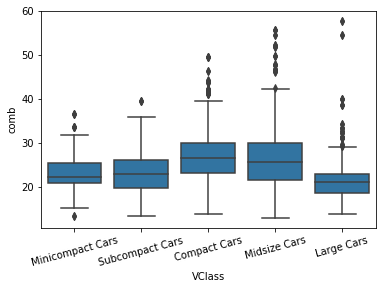

In [24]:
# Just substitute violin plot for box plot and we have got our output

base_color = sb.color_palette()[0]
sb.boxplot(data = fuel_econ, x = 'VClass', y = 'comb',
              color = base_color);
plt.xticks(rotation = 15);

> The bottom of each box, indicates the first quartile, and the top of each box, indicates the third quartile.
<br></br>
> The central line is the median of each group.
<br></br>
> Whiskers branch out toward the min and max in each group, with outliers depicted as individual points past a maximum whisker length. That depends on each group's box height. The taller each box the wider the whiskers can be.
<br></br>


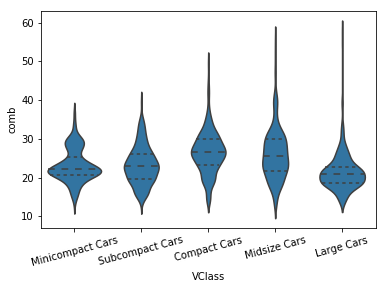

In [26]:
# With out inner = None

base_color = sb.color_palette()[0]
sb.violinplot(data = fuel_econ, x = 'VClass', y = 'comb',
              color = base_color, inner = 'quartile');
plt.xticks(rotation = 15);